## Retail Data Transformation and Analysis with PySpark

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg, count, countDistinct,desc
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
spark = SparkSession.builder.appName("Retail Data Transformation").getOrCreate()

In [0]:
df = spark.read.csv("dbfs:/FileStore/Retail_Store_Chain_Analysis/4_final_data.csv", 
                     header=True, inferSchema=True)

In [0]:
df

DataFrame[Row ID: int, Order ID: string, Order Date: date, Ship Date: date, Ship Mode: string, Customer ID: string, Customer Name: string, Segment: string, Country: string, City: string, State: string, Postal Code: int, Region: string, Product ID: string, Category: string, Sub-Category: string, Product Name: string, Sales: double, Order Year: int, Order Month: int]

In [0]:
df.show(1, truncate=False)

+------+--------------+----------+----------+--------------+-----------+-------------+--------+-------------+-------+-----+-----------+-------+---------------+---------------+------------+------------------------------------------------------------------------+------+----------+-----------+
|Row ID|Order ID      |Order Date|Ship Date |Ship Mode     |Customer ID|Customer Name|Segment |Country      |City   |State|Postal Code|Region |Product ID     |Category       |Sub-Category|Product Name                                                            |Sales |Order Year|Order Month|
+------+--------------+----------+----------+--------------+-----------+-------------+--------+-------------+-------+-----+-----------+-------+---------------+---------------+------------+------------------------------------------------------------------------+------+----------+-----------+
|7981  |CA-2015-103800|2015-01-03|2015-01-07|Standard Class|DP-13000   |Darren Powers|Consumer|United States|Houston|Texas|7

In [0]:
display(df)

In [0]:
df.select("Sales").summary().show()

+-------+------------------+
|summary|             Sales|
+-------+------------------+
|  count|              9800|
|   mean|140.81584877550767|
| stddev| 169.5517360055789|
|    min|             0.444|
|    25%|             17.24|
|    50%|            54.384|
|    75%|           210.564|
|    max|           500.641|
+-------+------------------+



In [0]:
# get the unique columns count in the DataFrame
columns = df.columns
for col_name in columns:
    df.select(countDistinct(col_name).alias(f"Unique {col_name}")).show()

+-------------+
|Unique Row ID|
+-------------+
|         9800|
+-------------+

+---------------+
|Unique Order ID|
+---------------+
|           4922|
+---------------+

+-----------------+
|Unique Order Date|
+-----------------+
|             1230|
+-----------------+

+----------------+
|Unique Ship Date|
+----------------+
|            1326|
+----------------+

+----------------+
|Unique Ship Mode|
+----------------+
|               4|
+----------------+

+------------------+
|Unique Customer ID|
+------------------+
|               793|
+------------------+

+--------------------+
|Unique Customer Name|
+--------------------+
|                 793|
+--------------------+

+--------------+
|Unique Segment|
+--------------+
|             3|
+--------------+

+--------------+
|Unique Country|
+--------------+
|             1|
+--------------+

+-----------+
|Unique City|
+-----------+
|        529|
+-----------+

+------------+
|Unique State|
+------------+
|          49|
+---------

### Product hierarchy organization

In [0]:
# Group products by Category and Sub-Category to analyze product hierarchy
product_hierarchy = df.groupBy("Category", "Sub-Category").agg(count("*").alias("Count")).orderBy("Category", desc("Count"))
product_hierarchy.show(truncate=False)


+---------------+------------+-----+
|Category       |Sub-Category|Count|
+---------------+------------+-----+
|Furniture      |Furnishings |931  |
|Furniture      |Chairs      |607  |
|Furniture      |Tables      |314  |
|Furniture      |Bookcases   |226  |
|Office Supplies|Binders     |1492 |
|Office Supplies|Paper       |1338 |
|Office Supplies|Storage     |832  |
|Office Supplies|Art         |785  |
|Office Supplies|Appliances  |459  |
|Office Supplies|Labels      |357  |
|Office Supplies|Envelopes   |248  |
|Office Supplies|Fasteners   |214  |
|Office Supplies|Supplies    |184  |
|Technology     |Phones      |876  |
|Technology     |Accessories |756  |
|Technology     |Machines    |115  |
|Technology     |Copiers     |66   |
+---------------+------------+-----+



In [0]:
# List distinct products with their Category and Sub-Category
product_hierarchy = df.select("Category", "Sub-Category", "Product Name").distinct().orderBy("Category", "Sub-Category")
product_hierarchy.show(truncate=False)
display(product_hierarchy)

+---------+------------+------------------------------------------------------------------------+
|Category |Sub-Category|Product Name                                                            |
+---------+------------+------------------------------------------------------------------------+
|Furniture|Bookcases   |Hon Metal Bookcases, Gray                                               |
|Furniture|Bookcases   |Bush Westfield Collection Bookcases, Dark Cherry Finish                 |
|Furniture|Bookcases   |O'Sullivan Elevations Bookcase, Cherry Finish                           |
|Furniture|Bookcases   |Global Adaptabilites Bookcase, Cherry/Storm Gray Finish                 |
|Furniture|Bookcases   |Rush Hierlooms Collection 1" Thick Stackable Bookcases                  |
|Furniture|Bookcases   |Safco Value Mate Steel Bookcase, Baked Enamel Finish on Steel, Black    |
|Furniture|Bookcases   |O'Sullivan Manor Hill 2-Door Library in Brianna Oak                     |
|Furniture|Bookcases

Category,Sub-Category,Product Name
Furniture,Bookcases,O'Sullivan Plantations 2-Door Library in Landvery Oak
Furniture,Bookcases,"Global Adaptabilites Bookcase, Cherry/Storm Gray Finish"
Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish"
Furniture,Bookcases,"Safco Value Mate Steel Bookcase, Baked Enamel Finish on Steel, Black"
Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Custom Colors"
Furniture,Bookcases,"Atlantic Metals Mobile 2-Shelf Bookcases, Custom Colors"
Furniture,Bookcases,"Safco Value Mate Series Steel Bookcases, Baked Enamel Finish on Steel, Gray"
Furniture,Bookcases,"Hon Metal Bookcases, Gray"
Furniture,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish"
Furniture,Bookcases,"Rush Hierlooms Collection 1"" Thick Stackable Bookcases"


- The **Furniture** category offers a variety of products, with **Furnishings** being the most popular, while **Bookcases** have fewer choices.
- **Office Supplies** includes many items, especially **Binders** and **Paper**, which are top-selling products.
- **Technology** features fewer options, with **Phones** being the most common, and **Copiers** being the least popular.
- Understanding these product hierarchies helps in identifying customer preferences and planning inventory and sales strategies accordingly.

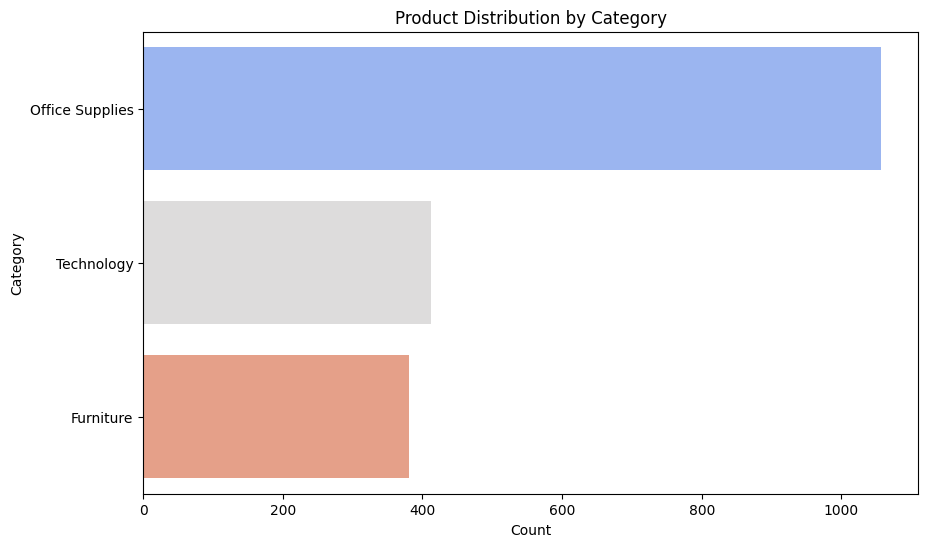

In [0]:
# Plot
product_hierarchy_pd = product_hierarchy.toPandas()
plt.figure(figsize=(10, 6))
sns.countplot(data=product_hierarchy_pd, y="Category", order=product_hierarchy_pd["Category"].value_counts().index, palette="coolwarm")
plt.title("Product Distribution by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


### Sales aggregations by Region and Category


In [0]:
# Aggregating total and average sales by region
sales_by_region = df.groupBy('Region').agg(
    sum('Sales').alias('Total Sales'),
    avg('Sales').alias('Average Sales')
).orderBy('Total Sales', ascending=False)
sales_by_region.show()


+-------+------------------+------------------+
| Region|       Total Sales|     Average Sales|
+-------+------------------+------------------+
|   West|453913.02400000347|144.55828789809027|
|   East| 393061.5650000013|141.13521184919256|
|Central| 306869.5690000008|134.76924418094018|
|  South|226151.16000000082|141.52137672090163|
+-------+------------------+------------------+



In [0]:
# Aggregating total and average sales by product category
sales_by_category = df.groupBy('Category').agg(
    sum('Sales').alias('Total Sales'),
    avg('Sales').alias('Average Sales')
).orderBy('Total Sales', ascending=False)
sales_by_category.show()

+---------------+------------------+-----------------+
|       Category|       Total Sales|    Average Sales|
+---------------+------------------+-----------------+
|Office Supplies|  484165.922000003|81.93703198510796|
|      Furniture|473164.65700000233|227.7019523580377|
|     Technology| 422664.7390000012|233.1300270270277|
+---------------+------------------+-----------------+



In [0]:
# Sales aggregations by Region and Category
sales_by_region_category = df.groupBy("Region", "Category").agg(
    sum("Sales").alias("Total Sales"),
    avg("Sales").alias("Average Sales"),
    count("Order ID").alias("Total Orders")
).orderBy('Total Sales', ascending=False)
sales_by_region_category.show(truncate=False)

+-------+---------------+------------------+------------------+------------+
|Region |Category       |Total Sales       |Average Sales     |Total Orders|
+-------+---------------+------------------+------------------+------------+
|West   |Furniture      |161259.6230000003 |233.37137916063722|691         |
|West   |Office Supplies|152806.81000000006|82.15419892473122 |1860        |
|West   |Technology     |139846.59100000042|237.43054499151177|589         |
|East   |Office Supplies|139213.38800000006|83.51133053389326 |1667        |
|East   |Furniture      |131085.88200000022|221.80352284263995|591         |
|East   |Technology     |122762.29500000027|232.94553130929845|527         |
|Central|Furniture      |107413.19100000024|228.53870425531966|470         |
|Central|Office Supplies|107119.92500000006|76.56892423159404 |1399        |
|Central|Technology     |92336.45300000018 |226.31483578431417|408         |
|South  |Office Supplies|85025.79900000007 |86.4962349949136  |983         |

1. **West** has the highest sales overall.
2. **Technology** category has the highest sales and average.
3. **Furniture** shows strong sales, especially in the **West** and **Central** regions.
4. **Office Supplies** has consistent sales, but lower averages.
5. **South** has the lowest total sales.

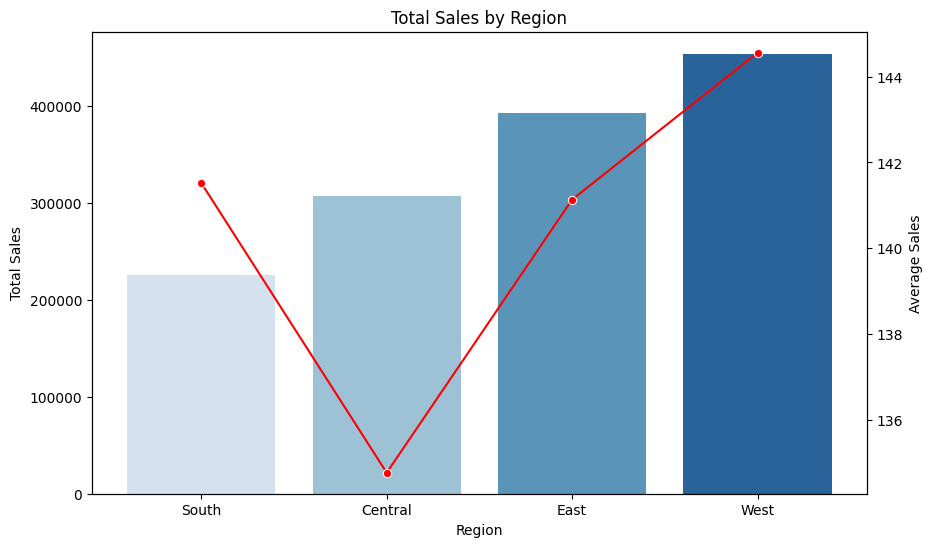

In [0]:
# Plot
sales_by_region_pd = sales_by_region.toPandas()

fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=sales_by_region_pd, x="Region", y="Total Sales", palette="Blues", ax=ax1)
ax1.set_ylabel("Total Sales")
ax1.set_xlabel("Region")
ax1.set_title("Total Sales by Region")
# Secondary Y-axis for Average Sales
ax2 = ax1.twinx()
sns.lineplot(data=sales_by_region_pd, x="Region", y="Average Sales", marker="o", color="red", ax=ax2)
ax2.set_ylabel("Average Sales")

plt.show()


### Product Sales Summary by Total Sales and Orders

In [0]:
# Calculate total sales and number of orders per product
product_sales_summary = df.groupBy("Product ID", "Product Name").agg(
    sum("Sales").alias("Total Sales"),
    count("Order ID").alias("Total Orders")
)
product_sales_summary.show(truncate=False)


+---------------+------------------------------------------------------------------------------------+------------------+------------+
|Product ID     |Product Name                                                                        |Total Sales       |Total Orders|
+---------------+------------------------------------------------------------------------------------+------------------+------------+
|FUR-BO-10003966|Sauder Facets Collection Library, Sky Alder Finish                                  |1427.683          |4           |
|OFF-BI-10000320|GBC Plastic Binding Combs                                                           |172.69199999999998|10          |
|TEC-MA-10003626|Hewlett-Packard Deskjet 6540 Color Inkjet Printer                                   |1001.282          |2           |
|OFF-SU-10004737|Acme Design Stainless Steel Bent Scissors                                           |88.92000000000002 |3           |
|OFF-AP-10002892|Belkin F5C206VTEL 6 Outlet Surge      

- Products like *Rubbermaid Chairmats* have high sales despite fewer orders.
- Items like *GBC Binding Combs* are ordered more frequently, showing steady demand.
- Sales vary due to price differences and customer preferences.

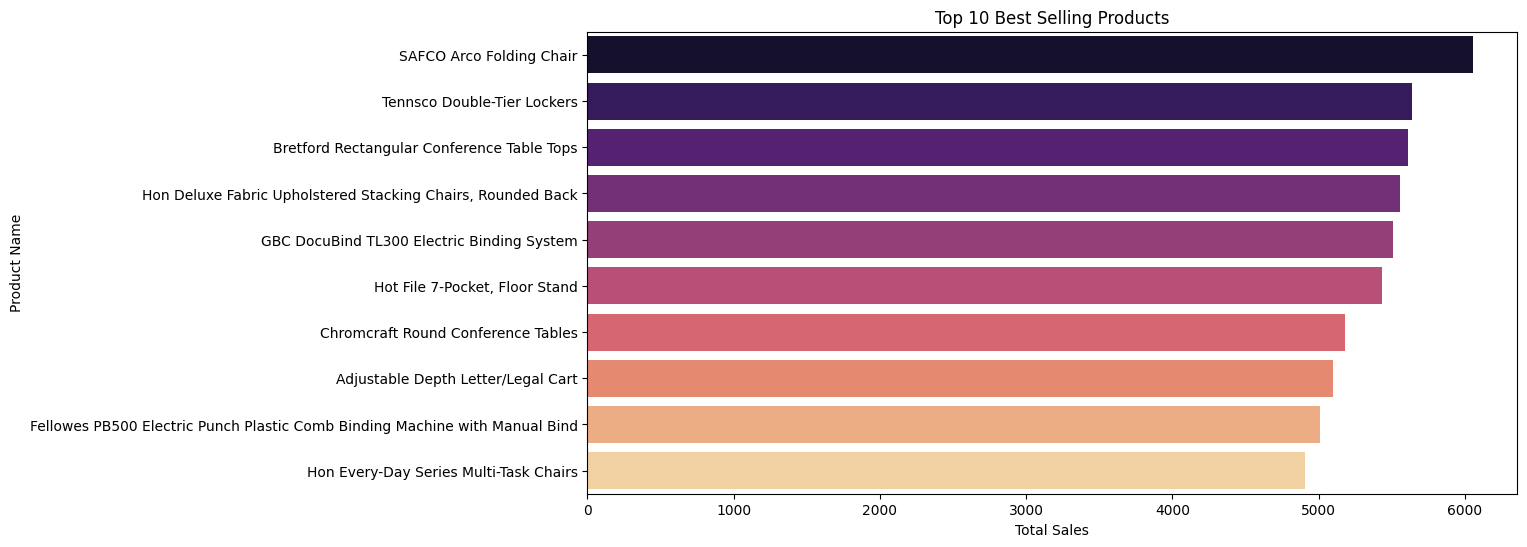

In [0]:
# Plot
product_sales_summary_pd = product_sales_summary.toPandas()
top_products = product_sales_summary_pd.nlargest(10, "Total Sales")

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, y="Product Name", x="Total Sales", palette="magma")
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()


### Customer purchase patterns

In [0]:
# Calculate total purchases and total spending per customer
customer_patterns = df.groupBy("Customer ID", "Customer Name").agg(
    countDistinct("Order ID").alias("Total Purchases"),
    sum("Sales").alias("Total Spent")
)
customer_patterns.orderBy(col("Total Purchases").desc()).show(truncate=False)

+-----------+-------------------+---------------+------------------+
|Customer ID|Customer Name      |Total Purchases|Total Spent       |
+-----------+-------------------+---------------+------------------+
|EP-13915   |Emily Phan         |17             |4428.900000000001 |
|JE-15745   |Joel Eaton         |13             |4285.412          |
|PG-18820   |Patrick Gardner    |13             |2992.5480000000007|
|ZC-21910   |Zuschuss Carroll   |13             |4550.5779999999995|
|CK-12205   |Chloris Kastensmidt|13             |2615.504          |
|KD-16495   |Keith Dawkins      |12             |3610.316          |
|KB-16585   |Ken Black          |12             |2231.551          |
|NS-18640   |Noel Staavos       |12             |2857.7530000000006|
|SH-19975   |Sally Hughsby      |12             |2425.0609999999997|
|SJ-20125   |Sanjit Jacobs      |12             |2815.1140000000005|
|BD-11320   |Bill Donatelli     |12             |3030.395          |
|RB-19465   |Rick Bensley       |1

In [0]:
# Analyzing customer purchases over the years
yearly_purchase = df.select( "Customer ID","Order Year").groupBy("Customer ID", "Order Year").count().orderBy("Customer ID", "Order Year")
yearly_purchase.show(truncate=False)

+-----------+----------+-----+
|Customer ID|Order Year|count|
+-----------+----------+-----+
|AA-10315   |2015      |4    |
|AA-10315   |2016      |1    |
|AA-10315   |2017      |4    |
|AA-10315   |2018      |2    |
|AA-10375   |2015      |2    |
|AA-10375   |2016      |4    |
|AA-10375   |2017      |4    |
|AA-10375   |2018      |5    |
|AA-10480   |2015      |1    |
|AA-10480   |2017      |10   |
|AA-10480   |2018      |1    |
|AA-10645   |2015      |6    |
|AA-10645   |2016      |3    |
|AA-10645   |2017      |8    |
|AA-10645   |2018      |1    |
|AB-10015   |2015      |4    |
|AB-10015   |2017      |2    |
|AB-10060   |2016      |1    |
|AB-10060   |2017      |9    |
|AB-10060   |2018      |8    |
+-----------+----------+-----+
only showing top 20 rows



- Some customers shop regularly, while others buy less often.  
- A few customers spend a lot more than others.  
- Buying habits change from year to year.  

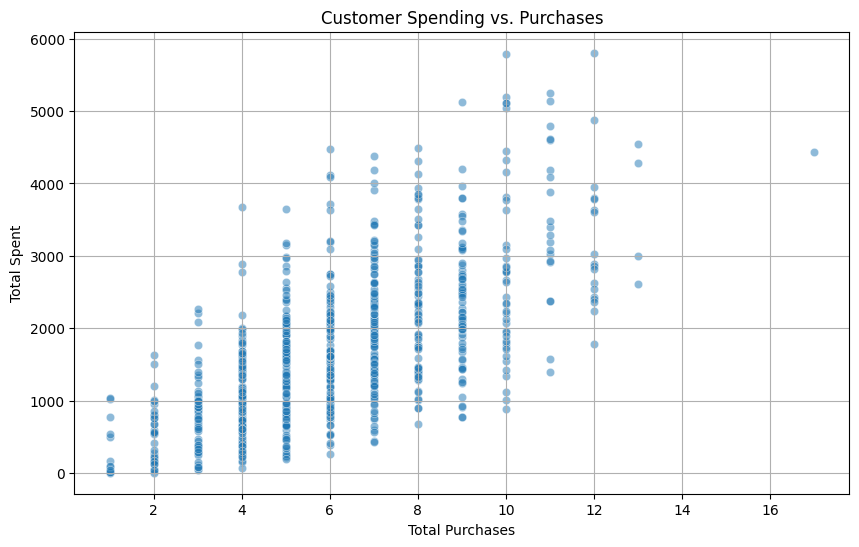

In [0]:
#  Plot
customer_patterns_pd = customer_patterns.toPandas()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_patterns_pd, x="Total Purchases", y="Total Spent", alpha=0.5)
plt.title("Customer Spending vs. Purchases")
plt.xlabel("Total Purchases")
plt.ylabel("Total Spent")
plt.grid(True)
plt.show()


### Seasonal Sales Trends

In [0]:
# Aggregating total sales, average sales, and total orders by year and month
seasonal_sales = df.groupBy("Order Year","Order Month").agg(
    sum("Sales").alias("Total Sales"),
    avg("Sales").alias("Average Sales"),
    count("Order ID").alias("Total Orders")
).orderBy("Order Year","Order Month")
seasonal_sales.show(truncate=False, n=df.count())


+----------+-----------+------------------+------------------+------------+
|Order Year|Order Month|Total Sales       |Average Sales     |Total Orders|
+----------+-----------+------------------+------------------+------------+
|2015      |1          |9912.735999999997 |128.73683116883115|77          |
|2015      |2          |3764.3130000000006|81.83289130434784 |46          |
|2015      |3          |21980.143999999997|142.72820779220777|154         |
|2015      |4          |18542.315999999995|142.63319999999996|130         |
|2015      |5          |16460.423         |136.03655371900825|121         |
|2015      |6          |20751.617999999988|158.40929770992358|131         |
|2015      |7          |20371.605999999992|143.462014084507  |142         |
|2015      |8          |20172.545999999977|138.16812328767108|146         |
|2015      |9          |37564.479000000036|140.6909325842698 |267         |
|2015      |10         |21706.353000000003|136.51794339622643|159         |
|2015      |

Sales increase from **2015 to 2018**, peaking in **November and December** each year. **January and February** have the lowest sales. **Average Sales per Order** fluctuates, with higher values in the holiday season.

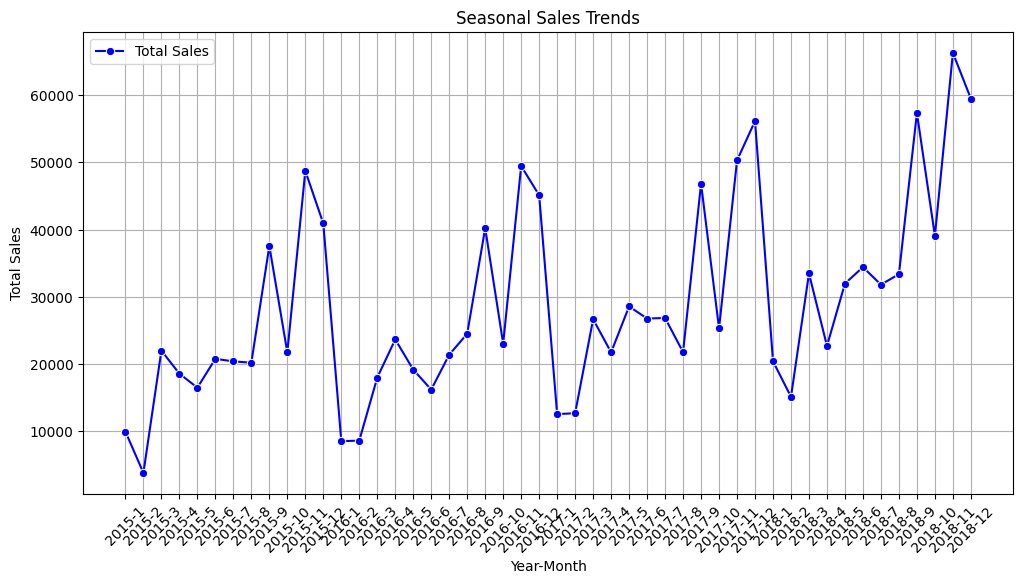

In [0]:

seasonal_sales_pd = seasonal_sales.toPandas()
seasonal_sales_pd.columns = ["Year", "Month", "Total Sales", "Average Sales", "Total Orders"]
seasonal_sales_pd = seasonal_sales_pd.sort_values(by=["Year", "Month"])

# Create a Year-Month column
seasonal_sales_pd["Year-Month"] = seasonal_sales_pd["Year"].astype(str) + "-" + seasonal_sales_pd["Month"].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_sales_pd, x="Year-Month", y="Total Sales", marker="o", label="Total Sales", color="blue")
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.title("Seasonal Sales Trends")
plt.legend()
plt.grid(True)
plt.show()
